# Generate Normal Training Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Normal (non-anomalous) data
X_train = np.random.multivariate_normal(
    mean=[10, 10],
    cov=[[3, 0.5], [0.5, 3]],
    size=300
)

# Visualize Normal Data

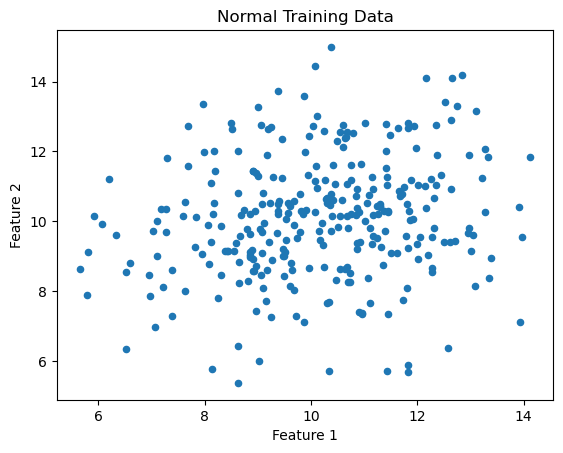

In [2]:
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Normal Training Data")
plt.show()


# Estimate Gaussian Parameters (μ, σ²)

In [3]:
mu = np.mean(X_train, axis=0)
sigma2 = np.var(X_train, axis=0)

# Gaussian Probability Function

In [4]:
def gaussian_prob(X, mu, sigma2):
    coeff = 1 / np.sqrt(2 * np.pi * sigma2)
    exponent = np.exp(-(X - mu) ** 2 / (2 * sigma2))
    return np.prod(coeff * exponent, axis=1)

# Compute Probabilities for Training Data

In [5]:
p_train = gaussian_prob(X_train, mu, sigma2)

# Add Some Anomalies (For Visualization)

In [6]:
X_anomaly = np.array([
    [2, 2],
    [18, 18],
    [0, 15],
    [20, 5]
])

# Combine & Compute Probabilities

In [7]:
X_all = np.vstack([X_train, X_anomaly])
p_all = gaussian_prob(X_all, mu, sigma2)

# Choose Threshold ε

In [8]:
epsilon = 1e-6
anomalies = p_all < epsilon

# Visualize Gaussian Contours + Anomalies

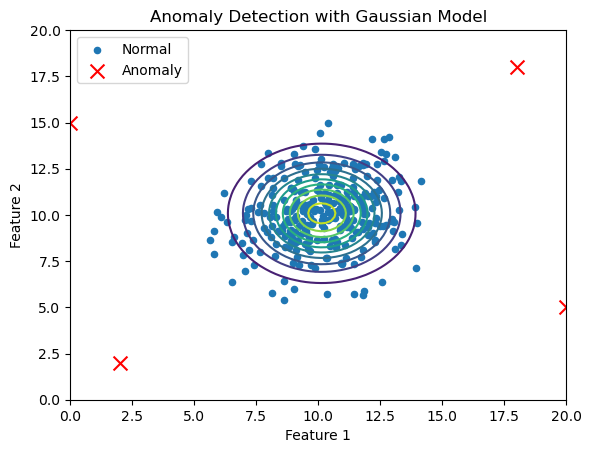

In [9]:
# Create grid for contour plot
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
X_grid, Y_grid = np.meshgrid(x, y)

grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]
Z = gaussian_prob(grid_points, mu, sigma2)
Z = Z.reshape(X_grid.shape)

plt.figure()

# Contours
plt.contour(X_grid, Y_grid, Z, levels=10)

# Normal points
plt.scatter(X_train[:, 0], X_train[:, 1], s=20, label="Normal")

# Anomalies
plt.scatter(
    X_all[anomalies][:, 0],
    X_all[anomalies][:, 1],
    color='red',
    marker='x',
    s=100,
    label="Anomaly"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Anomaly Detection with Gaussian Model")
plt.legend()
plt.show()

What This Visual Means (VERY IMPORTANT)

Ellipses → equal probability contours of Gaussian

Dense center → high probability (normal)

Far away points → low probability (anomalies)

Red ❌ → flagged anomalies (p(x) < ε)